# Proyek Analisis Data: [*Bike Sharing Dataset*]
- **Nama:** Bryan Florentino Leo
- **Email:** m008d4ky1694@bangkit.academy
- **ID Dicoding:** bryanflorentinoleo

## Menentukan Pertanyaan Bisnis

Berdasarkan [sumber](https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset), diketahui bahwa sistem *bike sharing* ialah wujud otomasi dari rental sepeda tradisional yang telah menunjukkan peran penting terhadap berbagai permasalahan lalu lintas, lingkungan alam, dan kesehatan.<br>

Terdapat dua *dataset* pada sumber, yaitu `day.csv` dan `hour.csv`, yang masing-masing tersusun atas atribut-atribut:
1. `instant`: indeks baris
2. `dteday`: tanggal observasi
3. `season`: musim (1 = semi, 2 = panas, 3 = gugur, 4 = dingin)
4. `yr`: tahun (0 = 2011, 1 = 2012)
5. `mnth`: bulan (1 hingga 12)
6. `hr`: jam (0 hingga 23; hanya terdapat pada `hour.csv`)
7. `holiday`: apakah suatu hari tergolong hari libur
8. `weekday`: urutan hari pada pekan yang bersesuaian
9. `workingday`: 1 untuk bukan akhir pekan atau hari libur, 0 untuk lainnya
10. `weathersit`: keadaan cuaca (1 = cerah/berawan, 2 = mendung/gerimis, 3 = salju atau hujan ringan, 4 = hujan deras atau hujan salju berkabut)
11. `temp`: suhu ternormalisasi (dalam Celsius, `t_min` = -8, `t_max` = 39)
12. `atemp`: suhu dirasakan ternormalisasi (dalam Celsius, `t_min` = -16, `t_max` = 50)
13. `hum`: tingkat kelembaban ternormalisasi (dibagi `hum_max` = 100)
14. `windspeed`: kecepatan angin ternormalisasi (dibagi `windspeed_max` = 67)
15. `casual`: jumlah perental biasa
16. `registered`: jumlah perental terdaftar
17. `cnt`: total jumlah perental sepeda<br>

Dari *dataset* yang ada, disusun dua buah pertanyaan bisnis sebagai berikut:
- Bagaimana rata-rata jumlah perental sepeda *casual*, *registered*, dan total pada hari kerja dan bukan hari kerja?
- Untuk tiap musim, pada jam berapakah umumnya sepeda paling banyak dirental?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
df_day = pd.read_csv("day.csv")
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
df_hour = pd.read_csv("hour.csv")
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

####Memeriksa tipe data per atribut

In [4]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Interpretasi:** Pada *dataset* `df_day`, terdapat 731 baris observasi dengan 11 atribut bertipe *integer*, 4 atribut bertipe *float*, dan 1 atribut bertipe *object*.

In [5]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Interpretasi:** Pada *dataset* `df_hour`, terdapat 17.379 baris observasi dengan 12 atribut bertipe *integer*, 4 atribut bertipe *float*, dan 1 atribut bertipe *object*.

#### Memeriksa *missing value*

In [6]:
df_day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Interpretasi:** Pada *dataset* `df_day`, tidak terdapat *missing value*.

In [7]:
df_hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Interpretasi:** Pada *dataset* `df_hour`, tidak terdapat *missing value*.

####Memeriksa *duplicated values*

In [8]:
df_day.duplicated().sum()

0

**Interpretasi:** Pada *dataset* `df_day`, tidak terdapat *duplicated value*.

In [9]:
df_hour.duplicated().sum()

0

**Interpretasi:** Pada *dataset* `df_hour`, tidak terdapat *duplicated value*.

####Memeriksa nilai *invalid*

In [10]:
df_day.describe().loc[['mean', 'std', 'min', 'max']]

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Interpretasi:** Pada *dataset* `df_day`, semua atribut mengandung nilai-nilai observasi dalam rentang kewajarannya.

In [11]:
df_hour.describe().loc[['mean', 'std', 'min', 'max']]

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Interpretasi:** Pada *dataset* `df_hour`, semua atribut mengandung nilai-nilai observasi dalam rentang kewajarannya.

### Cleaning Data

Tipe data atribut `dteday` diubah menuju *datetime*.

In [12]:
#df_day
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [13]:
#df_hour
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Selain itu, karena atribut:
- `instant` berperan serupa dengan indeks otomatis dari *DataFrame* Python,
- `dteday`, `yr`, dan `mnth` tidak dibutuhkan untuk menjawab permasalahan bisnis,
- `atemp` berperan serupa dengan atribut `temp`, dan
- `holiday` dan `weekday` berperan serupa dengan atribut `workingday`,
ketujuh atribut tersebut dikeluarkan dari kedua *dataset*.

In [14]:
df_day = df_day.drop(['instant', 'dteday', 'yr', 'mnth', 'holiday', 'weekday', 'atemp'], axis = 1)
df_hour = df_hour.drop(['instant', 'dteday', 'yr', 'mnth', 'holiday', 'weekday', 'atemp'], axis = 1)

In [15]:
df_day.head()

,season,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,0,2,0.344167,0.805833,0.160446,331,654,985
1,1,0,2,0.363478,0.696087,0.248539,131,670,801
2,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,1,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,1,1,1,0.226957,0.436957,0.186900,82,1518,1600


Pada *dataset* `df_day`, tersisa sepuluh atribut.

In [16]:
df_hour.head()

,season,hr,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,0,0,1,0.24,0.81,0.0,3,13,16
1,1,1,0,1,0.22,0.80,0.0,8,32,40
2,1,2,0,1,0.22,0.80,0.0,5,27,32
3,1,3,0,1,0.24,0.75,0.0,3,10,13
4,1,4,0,1,0.24,0.75,0.0,0,1,1


Pada *dataset* `df_hour`, tersisa sebelas atribut.

## Exploratory Data Analysis (EDA)

### Korelasi antaratribut

In [17]:
#df_day
df_day.corr()

,season,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
season,1.000000,0.012485,0.019211,0.334315,0.205445,-0.229046,0.210399,0.411623,0.406100
workingday,0.012485,1.000000,0.061200,0.052660,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,0.019211,0.061200,1.000000,-0.120602,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.334315,0.052660,-0.120602,1.000000,0.126963,-0.157944,0.543285,0.540012,0.627494
hum,0.205445,0.024327,0.591045,0.126963,1.000000,-0.248489,-0.077008,-0.091089,-0.100659
windspeed,-0.229046,-0.018796,0.039511,-0.157944,-0.248489,1.000000,-0.167613,-0.217449,-0.234545
casual,0.210399,-0.518044,-0.247353,0.543285,-0.077008,-0.167613,1.000000,0.395282,0.672804
registered,0.411623,0.303907,-0.260388,0.540012,-0.091089,-0.217449,0.395282,1.000000,0.945517
cnt,0.406100,0.061156,-0.297391,0.627494,-0.100659,-0.234545,0.672804,0.945517,1.000000


**Interpretasi:**<br>
- Korelasi terkuat ditunjukkan oleh pasangan atribut `cnt` dengan `registered`.
- Korelasi terlemah ditunjukkan oleh pasangan atribut `season` dengan `workingday`.

In [18]:
#df_hour
df_hour.corr()

,season,hr,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
season,1.000000,-0.006117,0.013743,-0.014524,0.312025,0.150625,-0.149773,0.120206,0.174226,0.178056
hr,-0.006117,1.000000,0.002285,-0.020203,0.137603,-0.276498,0.137252,0.301202,0.374141,0.394071
workingday,0.013743,0.002285,1.000000,0.044672,0.055390,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014524,-0.020203,0.044672,1.000000,-0.102640,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.312025,0.137603,0.055390,-0.102640,1.000000,-0.069881,-0.023125,0.459616,0.335361,0.404772
hum,0.150625,-0.276498,0.015688,0.418130,-0.069881,1.000000,-0.290105,-0.347028,-0.273933,-0.322911
windspeed,-0.149773,0.137252,-0.011830,0.026226,-0.023125,-0.290105,1.000000,0.090287,0.082321,0.093234
casual,0.120206,0.301202,-0.300942,-0.152628,0.459616,-0.347028,0.090287,1.000000,0.506618,0.694564
registered,0.174226,0.374141,0.134326,-0.120966,0.335361,-0.273933,0.082321,0.506618,1.000000,0.972151
cnt,0.178056,0.394071,0.030284,-0.142426,0.404772,-0.322911,0.093234,0.694564,0.972151,1.000000


**Interpretasi:**<br>
- Korelasi terkuat ditunjukkan oleh pasangan atribut `cnt` dengan `registered`.
- Korelasi terlemah ditunjukkan oleh pasangan atribut `workingday` dengan `hr`.

### Mengelompokkan data

#### `df_day`

In [19]:
#Jumlah hari berdasarkan cuaca
df_day.groupby(by = 'weathersit').agg({
    'cnt': 'count'
})

,cnt
weathersit,
1,463
2,247
3,21


**Interpretasi:** Dalam kurun tahun 2011 hingga 2012, terdapat:
- 463 hari dengan cuaca cerah/berawan,
- 247 hari dengan cuaca mendung/gerimis, dan
- 21 hari dengan cuaca hujan atau bersalju ringan.

In [20]:
#Rata-rata perental harian berdasarkan musim
df_day.groupby(by = 'season').agg({
    'cnt': 'mean'
})

,cnt
season,
1,2604.132597
2,4992.331522
3,5644.303191
4,4728.162921


**Interpretasi:**<br>
Berdasarkan observasi harian selama dua tahun, secara rata-rata, tiap harinya terdapat sekitar:
- 2.604 total perental pada musim semi,
- 4.992 total perental pada musim panas,
- 5.644 total perental pada musim gugur, dan
- 4.728 total perental pada musim dingin.

In [21]:
#Rata-rata perental harian berdasarkan hari kerja
df_day.groupby(by = 'workingday').agg({
    'casual': 'mean',
    'registered': 'mean',
    'cnt': 'mean',
})

,casual,registered,cnt
workingday,,,
0,1371.134199,2959.034632,4330.168831
1,606.570000,3978.250000,4584.820000


**Interpretasi:**<br>
Berdasarkan observasi harian selama dua tahun, secara rata-rata, tiap harinya terdapat sekitar:
- 1.371 perental biasa pada akhir pekan atau hari libur dan 607 perental biasa pada hari kerja;
- 2.959 perental terdaftar pada akhir pekan atau hari libur dan 3.978 perental terdaftar pada hari kerja; dan
- 4.330 total perental pada akhir pekan atau hari libur dan 4.585 total perental pada hari kerja.

In [22]:
#Rata-rata perental harian berdasarkan cuaca
df_day.groupby(by = 'weathersit').agg({
    'cnt': 'mean'
})

,cnt
weathersit,
1,4876.786177
2,4035.862348
3,1803.285714


**Interpretasi:**<br>
Berdasarkan observasi harian selama dua tahun, secara rata-rata, terdapat sekitar:
- 4.877 total perental ketika cuaca cerah atau berawan,
- 4.036 total perental ketika cuaca mendung atau gerimis, dan
- 1.803 total perental ketika cuaca hujan atau bersalju ringan.

#### `df_hour`

In [23]:
#Jumlah jam berdasarkan cuaca
df_hour.groupby(by = 'weathersit').agg({
    'cnt': 'count'
})

,cnt
weathersit,
1,11413
2,4544
3,1419
4,3


**Interpretasi:** Dalam kurun tahun 2011 hingga 2012, terdapat:
- 11.413 jam dengan cuaca cerah/berawan,
- 4.544 jam dengan cuaca mendung/gerimis,
- 1.419 jam dengan cuaca hujan atau bersalju ringan, dan
- 3 jam dengan cuaca hujan deras atau hujan salju berkabut.

In [24]:
#Rata-rata perental per jam berdasarkan musim
df_hour.groupby(by = 'season').agg({
    'cnt': 'mean'
})

,cnt
season,
1,111.114569
2,208.344069
3,236.016237
4,198.868856


**Interpretasi:**<br>
Berdasarkan observasi per jam selama dua tahun, secara rata-rata, tiap jamnya terdapat sekitar:
- 111 total perental pada musim semi,
- 208 total perental pada musim panas,
- 236 total perental pada musim gugur, dan
- 199 total perental pada musim dingin.

In [25]:
#Rata-rata perental per jam berdasarkan hari kerja
df_hour.groupby(by = 'workingday').agg({
    'casual': 'mean',
    'registered': 'mean',
    'cnt': 'mean',
})

,casual,registered,cnt
workingday,,,
0,57.441422,123.963910,181.405332
1,25.561315,167.646439,193.207754


**Interpretasi:**<br>
Berdasarkan observasi per jam selama dua tahun, secara rata-rata, tiap jamnya terdapat sekitar:
- 57 perental biasa pada akhir pekan atau hari libur dan 26 perental biasa pada hari kerja;
- 124 perental terdaftar pada akhir pekan atau hari libur dan 168 perental terdaftar pada hari kerja; dan
- 181 total perental pada akhir pekan atau hari libur dan 193 total perental pada hari kerja.

In [26]:
#Rata-rata perental per jam berdasarkan cuaca
df_hour.groupby(by = 'weathersit').agg({
    'cnt': 'mean'
})

,cnt
weathersit,
1,204.869272
2,175.165493
3,111.579281
4,74.333333


**Interpretasi:**<br>
Berdasarkan observasi per jam selama dua tahun, secara rata-rata, tiap jamnya terdapat sekitar:
- 205 total perental ketika cuaca cerah atau berawan,
- 175 total perental ketika cuaca mendung atau gerimis,
- 112 total perental ketika cuaca hujan atau bersalju ringan, dan
- 74 total perental ketika cuaca hujan deras atau hujan salju berkabut.

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana rata-rata jumlah perental sepeda *casual*, *registered*, dan total pada hari kerja dan bukan hari kerja?

In [27]:
dd = df_day.groupby(by = 'workingday').agg({
    'casual': 'mean',
    'registered': 'mean',
    'cnt': 'mean',
}).reset_index(drop = False)
dd

,workingday,casual,registered,cnt
0,0,1371.134199,2959.034632,4330.168831
1,1,606.570000,3978.250000,4584.820000


In [28]:
dd = dd.melt('workingday', var_name = 'Type', value_name = 'Count')
dd['workingday'] = dd['workingday'].replace([0, 1], ['Non-working day', 'Working day'])
dd

,workingday,Type,Count
0,Non-working day,casual,1371.134199
1,Working day,casual,606.570000
2,Non-working day,registered,2959.034632
3,Working day,registered,3978.250000
4,Non-working day,cnt,4330.168831
5,Working day,cnt,4584.820000


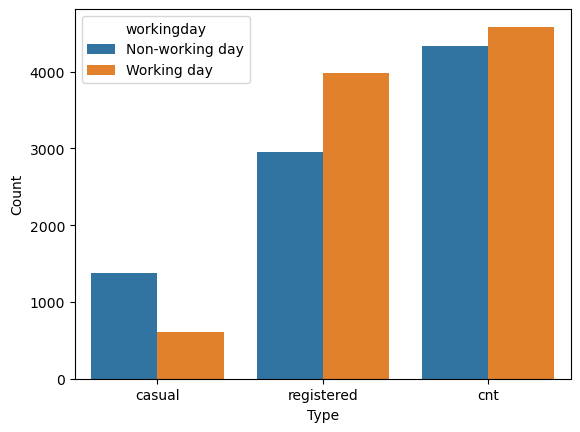

In [29]:
sns.barplot(data = dd, x = 'Type', y = 'Count', hue = 'workingday', errorbar = None)
plt.show()

**Interpretasi:**<br>
- Rata-rata perental terdaftar lebih banyak merental sepeda pada hari kerja, sedangkan rata-rata perental biasa lebih banyak merental sepeda pada akhir pekan dan hari libur.
- Rata-rata seluruh perental lebih banyak merental sepeda pada hari kerja.

### Pertanyaan 2:

Untuk tiap musim, pada jam berapakah umumnya sepeda paling banyak dirental?

In [30]:
dh = df_hour.groupby(by = ['season', 'hr']).agg({
    'cnt': 'mean'
}).reset_index(drop = False)
dh

,season,hr,cnt
0,1,0,27.404494
1,1,1,18.140449
2,1,2,12.794118
3,1,3,7.102564
4,1,4,3.181818
...,...,...,...
91,4,19,297.033898
92,4,20,212.141243
93,4,21,161.327684
94,4,22,123.564972


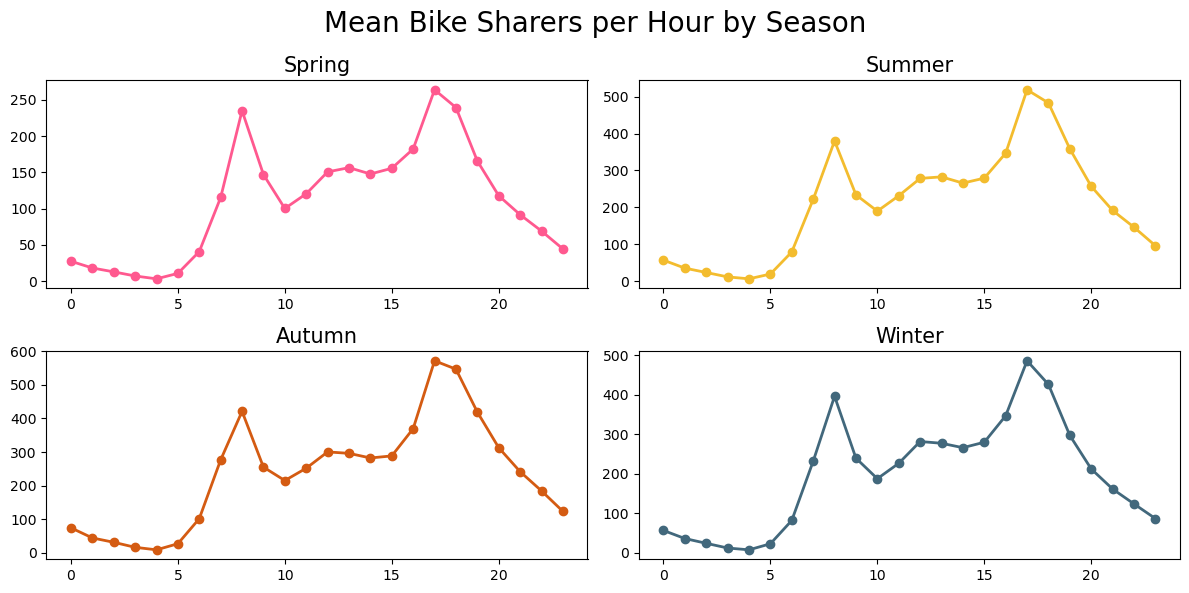

In [31]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 6))

axs[0, 0].plot(
    dh[dh['season'] == 1]['hr'],
    dh[dh['season'] == 1]['cnt'],
    marker = 'o',
    linewidth = 2,
    color = "#FF598F")
axs[0, 0].set_ylabel(None)
axs[0, 0].set_xlabel(None)
axs[0, 0].set_title("Spring", loc = "center", fontsize = 15)

axs[0, 1].plot(
    dh[dh['season'] == 2]['hr'],
    dh[dh['season'] == 2]['cnt'],
    marker = 'o',
    linewidth = 2,
    color = "#F3BC2E")
axs[0, 1].set_ylabel(None)
axs[0, 1].set_xlabel(None)
axs[0, 1].set_title("Summer", loc = "center", fontsize = 15)

axs[1, 0].plot(
    dh[dh['season'] == 3]['hr'],
    dh[dh['season'] == 3]['cnt'],
    marker = 'o',
    linewidth = 2,
    color = "#D45B12")
axs[1, 0].set_ylabel(None)
axs[1, 0].set_xlabel(None)
axs[1, 0].set_title("Autumn", loc = "center", fontsize = 15)

axs[1, 1].plot(
    dh[dh['season'] == 4]['hr'],
    dh[dh['season'] == 4]['cnt'],
    marker = 'o',
    linewidth = 2,
    color = "#42687C")
axs[1, 1].set_ylabel(None)
axs[1, 1].set_xlabel(None)
axs[1, 1].set_title("Winter", loc = "center", fontsize = 15)

plt.suptitle("Mean Bike Sharers per Hour by Season", fontsize = 20)

plt.tight_layout()
plt.show()

**Interpretasi:**<br>
Untuk keempat musim, secara rata-rata, sepeda paling banyak dirental pada pukul 17.00, diikuti pukul 18.00 dan 08.00.

## Conclusion

- Rata-rata perental terdaftar lebih banyak merental sepeda pada hari kerja, sedangkan rata-rata perental biasa lebih banyak merental sepeda pada akhir pekan dan hari libur.
- Rata-rata seluruh perental lebih banyak merental sepeda pada hari kerja.
- Untuk keempat musim, secara rata-rata, sepeda paling banyak dirental pada pukul 17.00, diikuti pukul 18.00 dan 08.00.

## **Analisis lanjutan**: Regresi linear

Akan dilakukan pemodelan regresi linear untuk mengetahui pengaruh `season`, `workingday`, `weathersit`, `temp`, `hum`, dan `windspeed` terhadap `cnt` secara **harian**.

In [32]:
#Importing libraries
from scipy import stats
from statsmodels.formula.api import ols

In [33]:
#Gathering data
df_reg = df_day.drop(['casual', 'registered'], axis = 1)
df_reg.head()

,season,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,2,0.344167,0.805833,0.160446,985
1,1,0,2,0.363478,0.696087,0.248539,801
2,1,1,1,0.196364,0.437273,0.248309,1349
3,1,1,1,0.200000,0.590435,0.160296,1562
4,1,1,1,0.226957,0.436957,0.186900,1600


### Uji-uji asumsi

#### Uji normalitas variabel dependen

Pengujian normalitas variabel `cnt` dilakukan secara eksploratif menggunakan *distribution plot* dan secara inferensial menggunakan uji Kolmogorov-Smirnov.

C:\Users\Bryan Florentino Leo\AppData\Local\Temp\ipykernel_28004\3408813670.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_reg['cnt'])


<Axes: xlabel='cnt', ylabel='Density'>

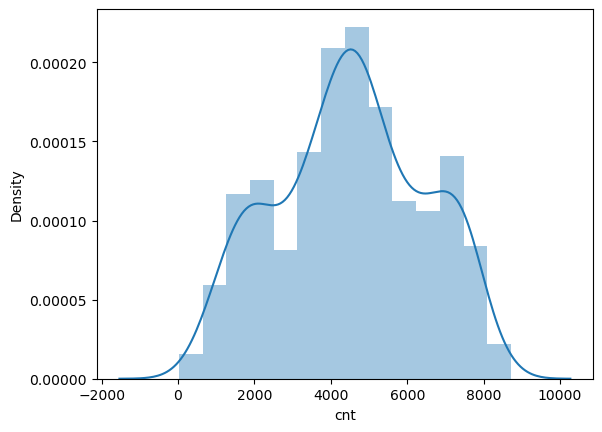

In [34]:
#Distribution plot
sns.distplot(df_reg['cnt'])

**Interpretasi:**<br>
Secara deskriptif, distribusi data atribut `cnt` menyerupai lonceng, tetapi terdapat dua titik stasioner pada kiri dan kanan puncak, sehingga tidak berdistribusi normal.

In [35]:
#Uji Kolmogorov-Smirnov
stats.kstest(df_reg['cnt'], stats.norm.cdf)

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=22, statistic_sign=-1)

**Interpretasi:**<br>
Berdasarkan uji Kolmogorov-Smirnov, diperoleh `p-value` senilai 0.0. Untuk tingkat signifikansi 5%, disimpulkan bahwa data atribut `cnt` tidak berdistribusi normal.

#### Uji linearitas antara variabel dependen dengan tiap variabel independen kontinu (*float*)

C:\Users\Bryan Florentino Leo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


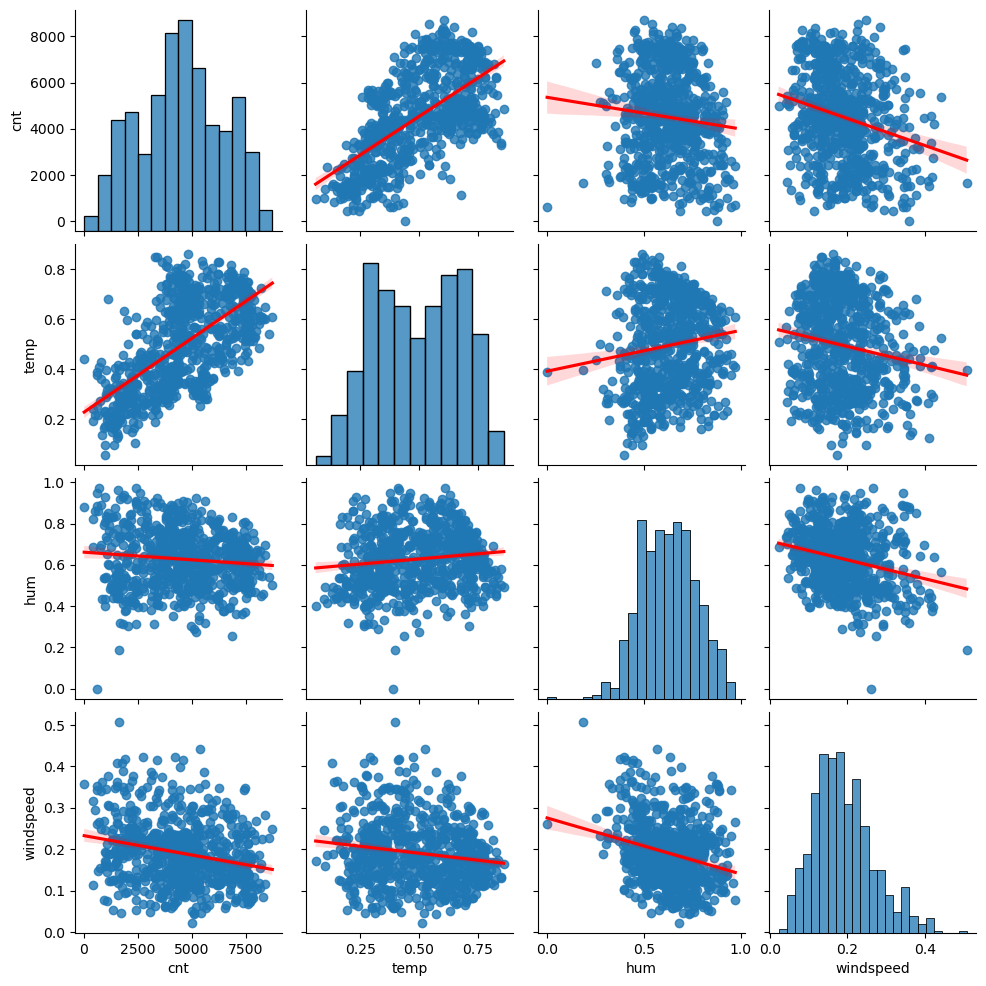

In [36]:
#Pairplot
sns.pairplot(df_reg[['cnt', 'temp', 'hum', 'windspeed']], kind = 'reg', plot_kws={'line_kws':{'color':'red'}})

**Interpretasi:**<br>
Terdapat hubungan linear antara variabel `cnt` dengan tiap variabel independen kontinu, sehingga asumsi linearitas **terpenuhi**.

**Kesimpulan:**
Dengan mengasumsikan asumsi normalitas terpenuhi, analisis regresi linear dapat dilakukan.

### Analisis regresi linear

Akan dibentuk model-model regresi linear dengan metode *enter*, yaitu dengan memasukkan semua variabel independen pada model mula-mula, lalu mengeluarkan satu per satu jika terdapat variabel-variabel independen yang koefisiennya tidak signifikan (ditandai dengan `P > |t|` melebihi 0.05), dimulai dari yang paling tidak signifikan.<br><br>

Catatan:
- Untuk variabel independen kategorik, akan dibentuk *dummy variables* sejumlah satu kurang dari banyaknya kategori. *Dummy variable* untuk suatu kategori bernilai 1 jika baris data masuk dalam kategori tersebut dan 0 untuk kategori lainnya.
- Jika salah satu atau lebih *dummy variable* tidak signifikan, variabel kategorik asalnya akan dikeluarkan dari model.

In [37]:
#Model 1
model1 = ols('cnt ~ C(season) + C(workingday) + C(weathersit) + temp + hum + windspeed', data = df_reg).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     101.0
Date:                Tue, 05 Mar 2024   Prob (F-statistic):          1.91e-121
Time:                        16:36:38   Log-Likelihood:                -6271.5
No. Observations:                 731   AIC:                         1.256e+04
Df Residuals:                     721   BIC:                         1.261e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           3024.4334    349.273      8.659      0.000    2338.720    3710.147
C(season)[T.2]       932.3164    178.597      5.220      0.000     581.684    1282.949
C(season)[T.3]       483.1702    235.591      2.051      0.041      20.645     945.696
C(season)[T.4]      1499.6312    152.393      9.841      0.000    1200.443    1798.819
C(workingday)[T.1]   155.0373    103.654      1.496      0.135     -48.463     358.538
C(weathersit)[T.2]  -232.3006    127.749     -1.818      0.069    -483.105      18.504
C(weathersit)[T.3] -1929.6958    326.781     -5.905      0.000   -2571.252   -1288.140
temp                6159.1228    481.123     12.802      0.000    5214.554    7103.692
hum                -2608.2282    461.107     -5.656      0.000   -3513.500   -1702.956
windspeed          -3305.9852    674.495     -4.901      0.000   -4630.194   -1981.776
==============================================================================
Omnibus:                       16.306   Durbin-Watson:                   0.437
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.277
Skew:                           0.137   Prob(JB):                      0.00587
Kurtosis:                       2.488   Cond. No.                         25.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interpretasi:**<br>
Pada model 1 (mula-mula), variabel `C(workingday)[T.1]` paling tidak signifikan, sehingga pada pembentukan model berikutnya, variabel `workingday` akan dikeluarkan dari model.

In [38]:
#Model 2
model2 = ols('cnt ~ C(season) + C(weathersit) + temp + hum + windspeed', data = df_reg).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     113.2
Date:                Tue, 05 Mar 2024   Prob (F-statistic):          5.27e-122
Time:                        16:36:38   Log-Likelihood:                -6272.6
No. Observations:                 731   AIC:                         1.256e+04
Df Residuals:                     722   BIC:                         1.260e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           3128.9358    342.506      9.135      0.000    2456.508    3801.363
C(season)[T.2]       926.9673    178.714      5.187      0.000     576.106    1277.829
C(season)[T.3]       471.3167    235.659      2.000      0.046       8.658     933.975
C(season)[T.4]      1496.7766    152.512      9.814      0.000    1197.357    1796.196
C(weathersit)[T.2]  -218.7671    127.537     -1.715      0.087    -469.155      31.621
C(weathersit)[T.3] -1902.8508    326.567     -5.827      0.000   -2543.985   -1261.716
temp                6205.4051    480.538     12.913      0.000    5261.987    7148.824
hum                -2635.1672    461.149     -5.714      0.000   -3540.521   -1729.814
windspeed          -3330.7870    674.869     -4.935      0.000   -4655.727   -2005.847
==============================================================================
Omnibus:                       19.172   Durbin-Watson:                   0.437
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.079
Skew:                           0.122   Prob(JB):                      0.00393
Kurtosis:                       2.449   Cond. No.                         22.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interpretasi:**<br>
Pada model 2, variabel `C(weathersit)[T.2]` paling tidak signifikan, sehingga pada pembentukan model berikutnya, variabel `weathersit` akan dikeluarkan dari model.

In [39]:
#Model 3
model3 = ols('cnt ~ C(season) + temp + hum + windspeed', data = df_reg).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     139.1
Date:                Tue, 05 Mar 2024   Prob (F-statistic):          5.68e-117
Time:                        16:36:38   Log-Likelihood:                -6289.5
No. Observations:                 731   AIC:                         1.259e+04
Df Residuals:                     724   BIC:                         1.263e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3734.7260    323.702     11.538      0.000    3099.220    4370.232
C(season)[T.2]   886.4621    182.371      4.861      0.000     528.424    1244.500
C(season)[T.3]   366.8133    240.107      1.528      0.127    -104.575     838.202
C(season)[T.4]  1442.8157    155.304      9.290      0.000    1137.916    1747.715
temp            6566.3054    482.788     13.601      0.000    5618.475    7514.136
hum            -3736.2692    362.764    -10.299      0.000   -4448.464   -3024.074
windspeed      -4231.4951    669.524     -6.320      0.000   -5545.936   -2917.054
==============================================================================
Omnibus:                        5.702   Durbin-Watson:                   0.469
Prob(Omnibus):                  0.058   Jarque-Bera (JB):                4.234
Skew:                           0.047   Prob(JB):                        0.120
Kurtosis:                       2.639   Cond. No.                         20.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interpretasi:**<br>
Pada model 3, variabel `C(season)[T.3]` paling tidak signifikan, sehingga pada pembentukan model berikutnya, variabel `season` akan dikeluarkan dari model.

In [40]:
#Model 4
model4 = ols('cnt ~ temp + hum + windspeed', data = df_reg).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     207.2
Date:                Tue, 05 Mar 2024   Prob (F-statistic):           4.26e-97
Time:                        16:36:38   Log-Likelihood:                -6343.9
No. Observations:                 731   AIC:                         1.270e+04
Df Residuals:                     727   BIC:                         1.271e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4084.3634    337.862     12.089      0.000    3421.061    4747.665
temp        6625.5327    293.085     22.606      0.000    6050.138    7200.927
hum        -3100.1231    383.992     -8.073      0.000   -3853.988   -2346.258
windspeed  -4806.9293    708.904     -6.781      0.000   -6198.673   -3415.186
==============================================================================
Omnibus:                       11.001   Durbin-Watson:                   0.404
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                8.213
Skew:                           0.152   Prob(JB):                       0.0165
Kurtosis:                       2.579   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interpretasi:**<br>
Pada model 4, seluruh variabel independen telah mempunyai koefisien yang signifikan, sehingga pembentukan model berakhir di sini.

### Pemilihan model terbaik

Model dengan koefisien variabel independen yang seluruhnya signifikan belum tentu merupakan model terbaik. Model terbaik mempunyai nilai *R-squared* dan *Adjusted R-squared* yang tertinggi serta *AIC* dan *BIC* yang terendah.

In [41]:
metric = pd.DataFrame(np.array([[model1.rsquared, model1.rsquared_adj, model1.aic, model1.bic],
                                [model2.rsquared, model2.rsquared_adj, model2.aic, model2.bic],
                                [model3.rsquared, model3.rsquared_adj, model3.aic, model3.bic],
                                [model4.rsquared, model4.rsquared_adj, model4.aic, model4.bic]]),
                      columns = ['R-squared', 'Adjusted R-squared', 'AIC', 'BIC'])
metric

,R-squared,Adjusted R-squared,AIC,BIC
0,0.557723,0.552202,12563.008847,12608.952982
1,0.556351,0.551435,12563.273527,12604.623248
2,0.535423,0.531573,12592.967342,12625.128237
3,0.460895,0.458670,12695.727850,12714.105503


**Interpretasi:**<br>
Model 1 mempunyai *R-squared* dan *Adjusted R-squared* tertinggi serta *AIC* terendah, sedangkan model 2 mempunyai *BIC* terendah. Dengan demikian, model terbaik untuk data yang ada adalah **model 1**.

### Model terbaik

Model terbaik untuk data yang ada ialah:<br>
$$\hat{cnt} = 3024.4334 + 932.3164\text{(Summer)} + 483.1702\text{(Autumn)} + 1499.6312\text{(Winter)} + 155.0373\text{(Working day)} - 232.3006\text{(Weather 2)} - 1929.6958\text{(Weather 3)} + 6159.1228\text{(temp)} - 2608.2282\text{(hum)} - 3305.9852\text{(windspeed)}.$$<br>

**Interpretasi:**
- Jika seluruh variabel bernilai 0, estimasi perental sepeda harian berjumlah sekitar 3.024 orang.
- Pada musim panas, estimasi perental sepeda harian sekitar 932 orang lebih dari musim semi.
- Pada musim gugur, estimasi perental sepeda harian sekitar 483 orang lebih dari musim semi.
- Pada musim dingin, estimasi perental sepeda harian sekitar 1.500 orang lebih dari musim semi.
- Pada hari kerja, estimasi perental sepeda harian sekitar 155 orang lebih dari hari libur atau akhir pekan.
- Pada cuaca mendung/gerimis, estimasi perental sepeda harian sekitar 232 kurang dari cuaca cerah/berawan.
- Pada cuaca hujan/salju ringan, estimasi perental sepeda harian sekitar 1.930 kurang dari cuaca cerah/berawan.
- Setiap pertambahan 0,01 satuan suhu ternormalisasi, estimasi perental sepeda harian bertambah sekitar 62 orang.
- Setiap pertambahan 0,01 satuan tingkat kelembaban ternormalisasi, estimasi perental sepeda harian berkurang sekitar 26 orang.
- Setiap pertambahan 0,01 satuan kecepatan angin ternormalisasi, estimasi perental sepeda harian berkurang sekitar 33 orang.